# Hackathon Project 

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## View of Dataset

In [2]:
df=pd.read_csv('dataframe_.csv')
df

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
...,...,...
1692,25.410184,-76.380902
1693,29.537304,-82.796934
1694,31.633331,-87.000000
1695,29.091458,-104.943052


## Information about Dataset

In [3]:
df.shape

(1697, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1696 non-null   float64
 1   output  1696 non-null   float64
dtypes: float64(2)
memory usage: 26.6 KB


## Relation between input output

In [5]:
df.corr()

,input,output
input,1.000000,0.511776
output,0.511776,1.000000


<AxesSubplot:>

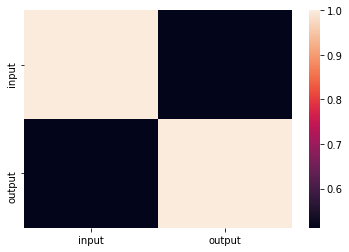

In [6]:
sns.heatmap(df.corr())

## checking missing values

In [7]:
df.isnull().sum()

input     1
output    1
dtype: int64

<AxesSubplot:>

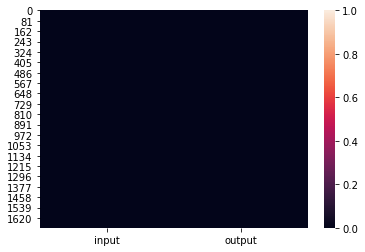

In [8]:
sns.heatmap(df.isnull())

one value is missing in input as well as one value is missing in output, so we can remove this row from the dataset it will not affect our result.

In [9]:
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

input     0
output    0
dtype: int64

Now there is no missing value in our dataset

## Checking duplicates

In [11]:
df.duplicated().sum()

606

There are 606 values are duplicates in our data set, so we have to drop these duplicates so algorithm can process the prediction efficiently

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.duplicated().sum()

0

## Mathematical summary of dataset

In [14]:
df.describe()

,input,output
count,1090.000000,1090.000000
mean,8.116185,-27.383628
std,78.769201,68.371895
min,-134.962839,-132.422167
25%,-51.041357,-76.994298
50%,17.462087,-46.300938
75%,76.481078,5.113101
max,134.605775,134.425495


In [15]:
df.sample(10)

,input,output
1110,-110.344221,123.087950
791,-104.366669,-46.000000
342,114.633331,94.000000
141,-51.608942,-33.186863
229,3.309414,-85.163601
237,29.671494,-73.487912
624,11.440266,-93.358732
143,-29.798926,-48.298082
762,-69.324710,-44.631109
522,105.343051,38.307624


<AxesSubplot:xlabel='input'>

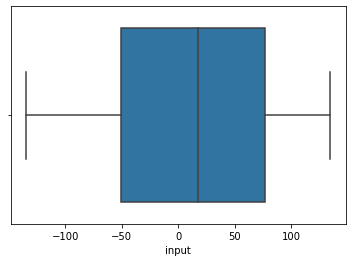

In [16]:
sns.boxplot(x=df["input"])

As we can see all the points lie in the range of variance or between the end point of box plot, so we can say that our dataset does not contain outliers

## Train Test Split

In [17]:
X=df.drop('output',axis=1)
Y=df['output']

# Splitting the dataset into the Training data set and Testing data set
from sklearn.model_selection import train_test_split

# 30% data for testing, random state 1
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=.7, random_state=1)


## Normalization 

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


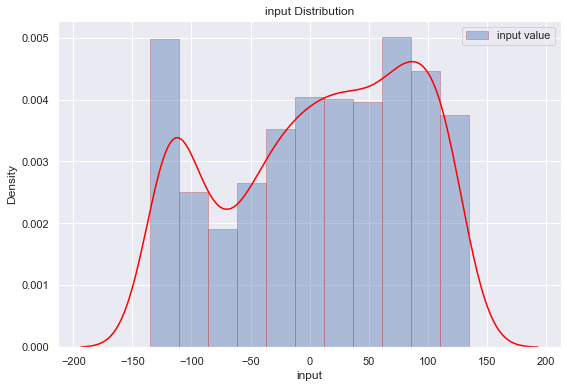

In [18]:
plt.figure(figsize=(9,6))
sns.set()
sns.distplot(df['input'],
            color='red',axlabel="input",
             label="input value",
            hist_kws={'color':'b','edgecolor':'r'})
plt.title("input Distribution")
plt.legend()
plt.show()

Here we can see that distribution is not Gaussian(bell shaped curve), so we will use the normalization technique.   Normalization often also simply called Min-Max scaling basically shrinks the range of the data such that the range is fixed between 0 and 1 (or -1 to 1 if there are negative values).

Mathematical expression of min max scaling is : Xi'= ( Xi - min(X) )/( max(X) - min(X) ), where Xi' is rescaled value, xi is a original value, min(X) is minimum value in feature and max(X) is maximum value in feature.

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
model=scaler.fit(X_train)
scaled_data=model.transform(X_train)
scaled_data=X_train

## Linear Regresssion

In [20]:
from sklearn.linear_model import LinearRegression

# initializing the algorithm
regressor = LinearRegression()

# Fitting Simple Linear Regression to the Training set
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [21]:
y_pred

array([  1.58407447, -39.48246325,  -8.2877526 , -66.72499999,
       -31.20960181, -39.62306645, -90.29016177, -59.1696147 ,
       -16.00069963, -22.6723058 , -44.24913561, -43.2169416 ,
         5.34497474, -12.6221495 , -17.60442331, -77.89699519,
        18.50445657, -44.21083249, -75.71534575, -18.47238651,
         6.96656315, -33.8462523 , -27.00144705, -77.34744053,
       -33.80266537, -84.0104014 , -73.14526904, -51.01626469,
       -33.72064393, -77.19069331,  19.13280195, -23.07089298,
       -71.66969016, -33.01120342, -15.63779587,  19.71196421,
       -41.06767586,  19.1521788 , -29.44278397, -50.03382466,
       -85.47119948, -19.80677397,  18.00984744, -41.64747614,
       -88.0947055 ,  24.79654177, -26.33135951, -82.32810687,
        15.53666365, -53.23948136,  19.13280195, -82.05405942,
       -87.40279523, -64.85633669,   4.74824875, -87.3448373 ,
        15.73547121, -86.50376065, -85.55513785,  10.73372105,
       -39.39696476, -84.18741403, -73.61480697,  19.58

In [22]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mse

3358.9697428121294

## Decision Tree Regressor

In [23]:
from sklearn.tree import DecisionTreeRegressor
# Fit regression model
regr = DecisionTreeRegressor(max_depth=2)
regr.fit(X_train, y_train)
# Predict
y_pred = regr.predict(X_test)
print(y_pred)

[-10.73044582 -60.36664549 -60.36664549 -60.36664549 -60.36664549
 -60.36664549 -60.36664549 -60.36664549 -60.36664549 -60.36664549
 -60.36664549 -60.36664549  28.19401737 -60.36664549 -60.36664549
 -60.36664549  88.7721472  -60.36664549 -60.36664549 -60.36664549
  28.19401737 -60.36664549 -60.36664549 -60.36664549 -60.36664549
 -60.36664549 -60.36664549 -60.36664549 -60.36664549 -60.36664549
  88.7721472  -60.36664549 -60.36664549 -60.36664549 -60.36664549
  88.7721472  -60.36664549  88.7721472  -60.36664549 -60.36664549
 -60.36664549 -60.36664549  88.7721472  -60.36664549 -60.36664549
  88.7721472  -60.36664549 -60.36664549  88.7721472  -60.36664549
  88.7721472  -60.36664549 -60.36664549 -60.36664549 -10.73044582
 -60.36664549  88.7721472  -60.36664549 -60.36664549  28.19401737
 -60.36664549 -60.36664549 -60.36664549  88.7721472   28.19401737
  88.7721472   88.7721472  -60.36664549 -10.73044582 -60.36664549
  88.7721472  -60.36664549  28.19401737 -60.36664549 -60.36664549
 -60.36664

In [24]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mse

1775.852340039755

## Support Vector Machine

In [25]:
from sklearn.svm import SVR
# Fit regression model
svr = SVR().fit(X_train, y_train)
# Predict
y_pred=svr.predict(X_test)
print(y_pred)

[ -9.91468028 -66.35833424 -48.70616929 -41.53167243 -77.63784663
 -66.12558357 -56.26726283 -41.47835565 -70.35264099 -79.33027823
 -58.34077044 -60.06961731   5.42464107 -62.22018107 -73.38788722
 -48.88574119  46.26807172 -58.40448377 -47.1583024  -74.80051667
  11.76788181 -74.74948249 -80.13801276 -48.44989161 -74.80400262
 -53.35916475 -45.20047021 -48.25623112 -74.90603526 -48.32545343
  47.43411534 -79.56366603 -44.16388079 -75.75688643 -69.59031998
  48.43427608 -63.7052881   47.46873799 -79.03862691 -49.52358721
 -54.23115159 -76.65359692  45.29145399 -62.72464691 -55.51330696
  54.10497399 -80.25357605 -52.23811387  39.65109507 -45.716236
  47.43411534 -52.04527881 -55.21350933 -41.00279963   3.03815329
 -55.18710296  40.15000331 -54.78204807 -54.27804889  25.40164838
 -66.49955019 -53.47020774 -45.54628699  48.21663722   7.09042644
  41.84485949  51.47571842 -50.78786561 -23.44269369 -37.60051922
  31.69725587 -29.0119261   26.71621435 -57.38893663 -61.97782526
 -79.8096212

In [26]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mse

1737.5760229202351

## Lasso Regression

In [27]:
from sklearn import linear_model
# Fit regression model
lassoReg = linear_model.Lasso(alpha=0.1)
lassoReg.fit(X_train,y_train)
# Predict
y_pred=lassoReg.predict(X_test)
print(y_pred)

[  1.58304265 -39.48198779  -8.28842209 -66.72352464 -31.20942999
 -39.62258583 -90.2878215  -59.16841666 -16.00108603 -22.67244733
 -44.24848519 -43.21632907   5.34380488 -12.6226599  -17.60475084
 -77.89510979  18.50280372 -44.21018348 -75.71354041 -18.47268219
   6.96533378 -33.84598371 -27.00142968 -77.34557529 -33.80239837
 -84.00829161 -73.14355804 -51.0153659  -33.72037994 -77.18883383
  19.13112604 -23.07101988 -71.66803331 -33.01096547 -15.63819559
  19.71026703 -41.06714222  19.15050217 -29.442677   -50.03296193
 -85.46903608 -19.80702067  18.00821274 -41.64692121 -88.0924458
  24.79465797 -26.33136674 -82.32605882  15.53511972 -53.23850097
  19.13112604 -82.05202143 -87.40056093 -64.85492992   4.74710079
 -87.34260513  15.73391999 -86.50155935 -85.55297136  10.73235341
 -39.39649243 -84.18529774 -73.61307874  19.58062682   5.76419448
  16.4341213   21.82813077 -49.10955176  -1.69291374  -5.2526837
  12.69121811  -3.06679395  11.12616817 -44.82381117 -42.08778489
 -23.5714489

In [28]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mse

3358.9616610483104